In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

df = pd.read_csv('clean_data/data_set_CLEAN.csv')
features = df.columns
# Define the order of categories
energy_class_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Convert the "Energy Class" column to categorical with the specified order
df['Energy class'] = pd.Categorical(df['Energy class'], categories=energy_class_order, ordered=True)

df['price_sqm'] = df['Price (euro)'] / df['Living surface (sqm)']



Group 1:

Construction year: 24.09%
Building condition boolean: 12.05%
Double glazing boolean: 9.44%


Group 2:

Accessible for disabled people boolean: 7.25%
Living surface (sqm): 6.78%
Furnished boolean: 5.81%


Group 3:

Nb of Bedrooms: 5.59%
Bathrooms total nb: 4.75%
Kitchen equipped boolean: 4.41%


Group 4:

Open fire: 4.09%
Number of frontages: 3.41%
Swimming pool boolean: 2.88%


Group 5:

Plot surface (sqm): 2.75%
Terrace surface (sqm): 2.60%
Garden surface (sqm): 1.79%


Group 6:

Parking tot nb: 1.47%
Flood safe boolean: 0.84%
Tenement building boolean: 0.00%




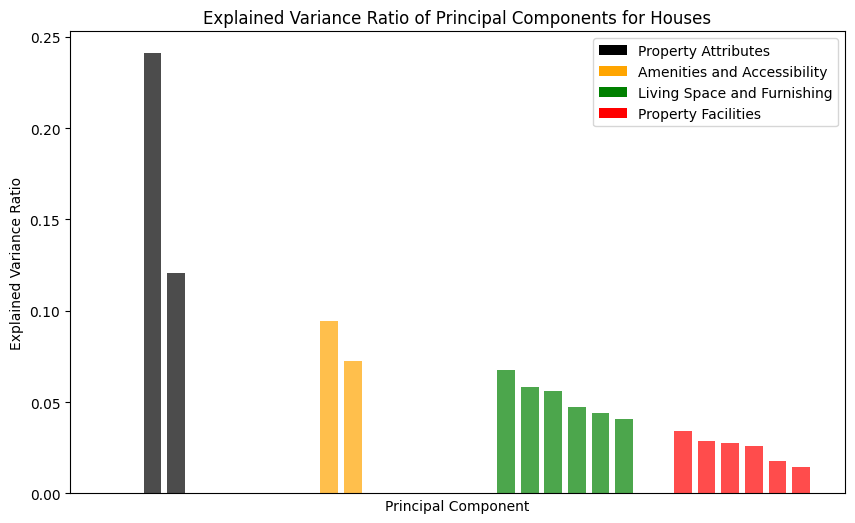

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assume df is your original DataFrame

# Drop rows with missing values
pcadf = df[df['Type of property'] == 'House']
pcadf = pcadf.dropna()

# Drop specified columns
columns_to_drop = ['Property ID', 'price_sqm', 'Price (euro)', 'Garden boolean', 'Parking boolean', 'Terrace boolean',
                   'Bathrooms total nb boolean', 'Bathrooms', 'Shower rooms', 'Outdoor parking spaces', 
                   'Covered parking spaces', 'Postal code','Energy class boolean','Elevator boolean','Energy class','New Construction boolean']
pcadf.drop(columns=columns_to_drop, inplace=True)

# Selecting numerical columns for PCA
numerical_columns = pcadf.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Handling non-numeric values and missing data
numeric_transformer = StandardScaler()

# One-hot encode categorical columns
categorical_columns = []  # No categorical columns now

# Preprocess and transform the data
scaled_data = numeric_transformer.fit_transform(pcadf[numerical_columns])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Fit OneHotEncoder and get feature names
encoder = OneHotEncoder()
encoder.fit(pcadf[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns).tolist()

# Combine column names
column_names = numerical_columns + encoded_column_names

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Extracting column names and their explained variance
variance_explained = [(column_names[i], explained_variance_ratio[i] * 100) for i in range(len(column_names))]

# Change the number of groups
num_groups = 5  # Change the number of groups here

# Reset groupings dictionary
groupings = {}

# Determine the number of features per group
features_per_group = len(variance_explained) // num_groups

# Grouping the column names and their explained variance
for i, (column, variance) in enumerate(variance_explained):
    group_index = i // features_per_group
    group = f'Group {group_index + 1}'
    if group not in groupings:
        groupings[group] = []
    groupings[group].append((column, variance))

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Sort the explained variance ratio in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
explained_variance_ratio_sorted = [explained_variance_ratio[i] for i in sorted_indices]

grouped_indices = [[0,1],[2,3],[4,5,6,7,8,9],[10,11,12,13,14,15]]
# Customizable group names and colors
custom_group_labels = ['Property Attributes', 'Amenities and Accessibility', 'Living Space and Furnishing','Property Facilities']
custom_colors = ['black', 'orange', 'green','red']

plt.figure(figsize=(10, 6))

bar_width = 0.15  # Width of each bar
space_between_bars = 0.05  # Space between bars
space_between_groups = 1.5  # Space between groups

# Plot bars for each group
for i, indices in enumerate(grouped_indices):
    group_label = custom_group_labels[i] if i < len(custom_group_labels) else f'Group {i+1}'
    color = custom_colors[i % len(custom_colors)] if i < len(custom_colors) else 'blue'
    for j, idx in enumerate(indices):
        x_position = i * space_between_groups + j * (bar_width + space_between_bars)
        plt.bar(x_position, explained_variance_ratio[idx], width=bar_width, alpha=0.7, color=color)

# Print the grouped features and their explained variance
for group, columns in groupings.items():
    print(f"{group}:\n")
    for column, variance in columns:
        print(f"{column}: {variance:.2f}%")
    print("\n")

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Houses')

# Create legend for groups
group_labels = custom_group_labels[:num_groups]
for i, label in enumerate(group_labels):
    plt.bar(0, 0, color=custom_colors[i % len(custom_colors)], label=label)

plt.legend()

plt.xticks([])

plt.show()



Group 1:

Construction year: 14.22%
Building condition boolean: 9.21%
Double glazing boolean: 7.78%


Group 2:

Elevator boolean: 6.87%
Accessible for disabled people boolean: 6.39%
Living surface (sqm): 6.11%


Group 3:

Furnished boolean: 5.77%
Nb of Bedrooms: 5.76%
Bathrooms total nb: 5.51%


Group 4:

Kitchen equipped boolean: 5.41%
Open fire: 5.27%
Number of frontages: 4.92%


Group 5:

Swimming pool boolean: 4.72%
Plot surface (sqm): 3.80%
Terrace surface (sqm): 3.61%


Group 6:

Garden surface (sqm): 3.09%
Parking tot nb: 1.56%
Flood safe boolean: 0.00%


Group 7:

Tenement building boolean: 0.00%




C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2499513046.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2499513046.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



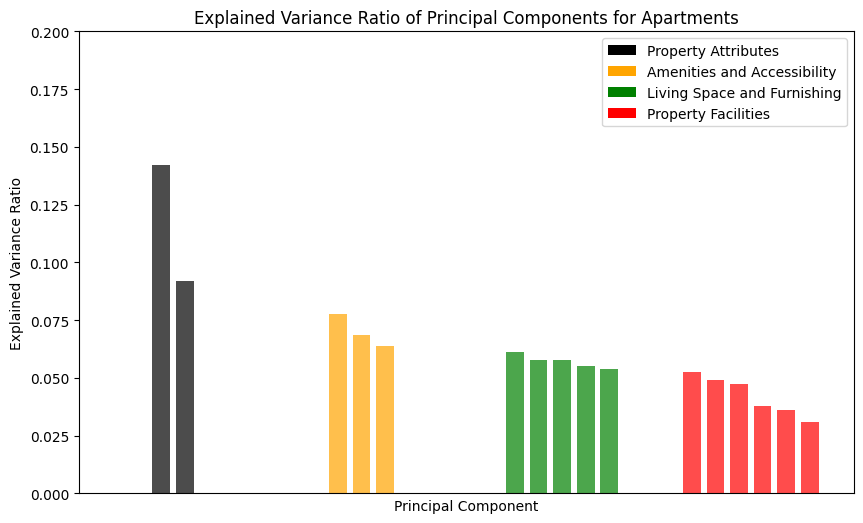

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assume df is your original DataFrame
#df = pd.read_csv('clean_data/data_set_CLEAN.csv')
# Drop rows with missing values
pcadf2 = df[df['Type of property'] == 'Apartment']

numeric_columns = pcadf2.select_dtypes(include=['number']).columns

# fill -1 to all NaN 
pcadf2[numeric_columns] = pcadf2[numeric_columns].fillna(0)

# Drop specified columns
columns_to_drop = ['Property ID', 'price_sqm', 'Price (euro)', 'Garden boolean', 'Parking boolean', 'Terrace boolean',
                   'Bathrooms total nb boolean', 'Bathrooms', 'Shower rooms', 'Outdoor parking spaces', 
                   'Covered parking spaces', 'Postal code','Energy class boolean','Energy class', 'New Construction boolean']
pcadf2.drop(columns=columns_to_drop, inplace=True)

pcadf2 = pcadf2.dropna()
# Selecting numerical columns for PCA
numerical_columns = pcadf2.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fill missing values with mean for numerical columns
#pcadf2[numerical_columns] = pcadf2[numerical_columns].fillna(pcadf2[numerical_columns].mean())

# Handling non-numeric values and missing data
numeric_transformer = StandardScaler()
# One-hot encode categorical columns
categorical_columns = []  # No categorical columns now

# Preprocess and transform the data
scaled_data = numeric_transformer.fit_transform(pcadf2[numerical_columns])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Fit OneHotEncoder and get feature names
encoder = OneHotEncoder()
encoder.fit(pcadf2[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns).tolist()

# Combine column names
column_names = numerical_columns + encoded_column_names

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Extracting column names and their explained variance
variance_explained = [(column_names[i], explained_variance_ratio[i] * 100) for i in range(len(column_names))]

# Change the number of groups
num_groups = 5  # Change the number of groups here

# Reset groupings dictionary
groupings = {}

# Determine the number of features per group
features_per_group = len(variance_explained) // num_groups

# Grouping the column names and their explained variance
for i, (column, variance) in enumerate(variance_explained):
    group_index = i // features_per_group
    group = f'Group {group_index + 1}'
    if group not in groupings:
        groupings[group] = []
    groupings[group].append((column, variance))

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Sort the explained variance ratio in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
explained_variance_ratio_sorted = [explained_variance_ratio[i] for i in sorted_indices]

grouped_indices = [[0,1],[2,3,4],[5,6,7,8,9],[10,11,12,13,14,15]]

# Customizable group names and colors
custom_group_labels = ['Property Attributes', 'Amenities and Accessibility', 'Living Space and Furnishing','Property Facilities']
custom_colors = ['black', 'orange', 'green','red']

plt.figure(figsize=(10, 6))

bar_width = 0.15  # Width of each bar
space_between_bars = 0.05  # Space between bars
space_between_groups = 1.5  # Space between groups

# Plot bars for each group
for i, indices in enumerate(grouped_indices):
    group_label = custom_group_labels[i] if i < len(custom_group_labels) else f'Group {i+1}'
    color = custom_colors[i % len(custom_colors)] if i < len(custom_colors) else 'blue'
    for j, idx in enumerate(indices):
        x_position = i * space_between_groups + j * (bar_width + space_between_bars)
        plt.bar(x_position, explained_variance_ratio[idx], width=bar_width, alpha=0.7, color=color)

# Print the grouped features and their explained variance
for group, columns in groupings.items():
    print(f"{group}:\n")
    for column, variance in columns:
        print(f"{column}: {variance:.2f}%")
    print("\n")

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Apartments')
plt.ylim(0,0.2)

# Create legend for groups
group_labels = custom_group_labels[:num_groups]
for i, label in enumerate(group_labels):
    plt.bar(0, 0, color=custom_colors[i % len(custom_colors)], label=label)

plt.legend()

# Hide x-axis labels
plt.xticks([])

plt.show()




In [12]:
def province(dfval):
    postal_codes = [range(1000,1300), range(1300, 1500), range(1500,1990), range(3000,3500), range(2000,3000), range(3500,4000), range(4000,5000), range(5000,6000), range(6000,6600), range(7000,8000), range(6600,7000), range(8000,9000), range(9000,10000)]
    provinces = ['Brussels Hoofdstedelijk Gewest', 'Waals-Brabant', 'Vlaams-Brabant', 'Vlaams-Brabant', 'Antwerpen', 'Limburg', 'Luik', 'Namen','Henegouwen', 'Henegouwen','Luxemburg', 'West-Vlaanderen', 'Oost-Vlaanderen']
    
    for pc_range, prov in zip(postal_codes, provinces):
        if dfval in pc_range:
            return prov

df['province'] = df['Postal code'].apply(lambda x: province(x))


def region(dfval):
    if dfval in range(1300,1500) or dfval in range(4000,7000):
        return 'Wallonia'
    elif dfval in range(1000,1300):
        return 'Brussels'
    else:
        return 'Flanders'

df['region'] = df['Postal code'].apply(lambda x: region(x))

countrydf = df[['Locality','Postal code','Construction year', 'Price (euro)','Type of property', 'Subtype', 'Energy class', 'Heating type', 'Building condition','province','region','price_sqm']]
countrydf['price_sqm'] = round(countrydf['price_sqm'])
countrydf['Locality'] = countrydf['Locality'].str.capitalize()
display(countrydf.head())

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2810977237.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2810977237.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Locality,Postal code,Construction year,Price (euro),Type of property,Subtype,Energy class,Heating type,Building condition,province,region,price_sqm
0,Ronse,9600,"1,959",259000,House,villa,E,Gas,To renovate,Oost-Vlaanderen,Flanders,"1,570"
1,Zottegem,9620,"1,976",645000,House,villa,E,Fuel oil,Good,Oost-Vlaanderen,Flanders,"2,371"
2,Seraing,4100,"1,900",329000,House,mixed-use-building,E,Gas,To renovate,Luik,Wallonia,"2,991"
3,Beersel,1653,"1,979",379000,House,town-house,F,Fuel oil,Good,Vlaams-Brabant,Flanders,"2,369"
4,Oupeye,4684,"1,990",199000,House,bungalow,NaN,Electric,To be done,Luik,Wallonia,"2,457"


In [17]:
pd.options.display.float_format = '{:,.0f}'.format

pricedf = df[['Locality', 'Postal code', 'Price (euro)', 'Type of property', 'price_sqm','province']]
housedf = pricedf[pricedf['Type of property'] == 'House']
housedf = housedf.sort_values('Price (euro)')
housedf = housedf.groupby('Postal code').agg({'Locality': 'first','province':'first', 'Price (euro)': 'mean', 'price_sqm': 'mean' })
# Find the 5 postal codes with the lowest prices
lowest_prices = housedf.nsmallest(5, 'Price (euro)').drop(columns='price_sqm')
lowestsqm = housedf.nsmallest(5, 'price_sqm').drop(columns='Price (euro)')

# Find the 5 postal codes with the highest prices
highest_prices = housedf.nlargest(5, 'Price (euro)').drop(columns='price_sqm')
highestsqm = housedf.nlargest(7, 'price_sqm').drop(columns='Price (euro)')

print("5 postal codes with the lowest prices for houses:")
display(lowest_prices, lowestsqm)

print("\n5 postal codes with the highest prices for houses:")
display(highest_prices, highestsqm)



5 postal codes with the lowest prices for houses:


,Locality,province,Price (euro)
Postal code,,,
6440,froidchapelle,Henegouwen,"75,000"
6464,riezes,Henegouwen,"79,667"
5542,blaimont,Namen,"84,000"
4601,vise,Luik,"85,000"
4834,limbourg,Luik,"94,000"


,Locality,province,price_sqm
Postal code,,,
6824,chassepierre,Luxemburg,312
8583,bossuit,West-Vlaanderen,466
6741,vance,Luxemburg,478
8978,watou,West-Vlaanderen,651
5544,agimont,Namen,729



5 postal codes with the highest prices for houses:


,Locality,province,Price (euro)
Postal code,,,
1404,nivelles,Waals-Brabant,"3,250,000"
8300,knokke,West-Vlaanderen,"2,902,847"
4731,raeren,Luik,"2,890,000"
6688,longchamps,Luxemburg,"2,250,000"
1190,forest,Brussels Hoofdstedelijk Gewest,"2,031,240"


,Locality,province,price_sqm
Postal code,,,
4525,retranchement,Luik,"13,770"
8300,knokke,West-Vlaanderen,"9,774"
9676,winseler,Oost-Vlaanderen,"7,750"
1404,nivelles,Waals-Brabant,"5,570"
4731,raeren,Luik,"5,446"
8301,heist-aan-zee,West-Vlaanderen,"4,903"
9881,aalter,Oost-Vlaanderen,"4,740"


In [18]:
pd.options.display.float_format = '{:,.0f}'.format

pricedf = df[['Locality', 'Postal code', 'Price (euro)', 'Type of property', 'price_sqm','province']]
appartmentdf = pricedf[pricedf['Type of property'] == 'Apartment']
appartmentdf = appartmentdf.sort_values('Price (euro)')
appartmentdf = appartmentdf.groupby('Postal code').agg({'Locality': 'first','province':'first', 'Price (euro)': 'mean', 'price_sqm': 'mean' })
# Find the 5 postal codes with the lowest prices
lowest_prices = appartmentdf.nsmallest(5, 'Price (euro)').drop(columns='price_sqm')
lowestsqm = appartmentdf.nsmallest(5, 'price_sqm').drop(columns='Price (euro)')

# Find the 5 postal codes with the highest prices
highest_prices = appartmentdf.nlargest(5, 'Price (euro)').drop(columns='price_sqm')
highestsqm = appartmentdf.nlargest(6, 'price_sqm').drop(columns='Price (euro)')

print("5 postal codes with the lowest prices for appartments:")
display(lowest_prices, lowestsqm)

print("\n5 postal codes with the highest prices for appartments:")
display(highest_prices, highestsqm)



5 postal codes with the lowest prices for appartments:


,Locality,province,Price (euro)
Postal code,,,
5550,vresse-sur-semois-membre,Namen,"77,250"
6987,rendeux,Luxemburg,"104,000"
4820,dison,Luik,"105,667"
6001,charleroi-marcinelle,Henegouwen,"114,780"
6870,st-hubert,Luxemburg,"115,000"


,Locality,province,price_sqm
Postal code,,,
6887,herbeumont,Luxemburg,605
7780,comines-warneton,Henegouwen,780
4821,andrimont,Luik,876
6120,ham-sur-heure-nalinnes-jamioulx,Henegouwen,928
6750,musson,Luxemburg,982



5 postal codes with the highest prices for appartments:


,Locality,province,Price (euro)
Postal code,,,
8300,knocke-heist,West-Vlaanderen,"1,230,666"
1933,zaventem-sterrebeek,Vlaams-Brabant,"1,225,444"
2110,wijnegem,Antwerpen,"1,061,472"
9830,sint-martens-latem,Oost-Vlaanderen,"987,750"
8301,knocke-heyst,West-Vlaanderen,"789,211"


,Locality,province,price_sqm
Postal code,,,
8300,knocke-heist,West-Vlaanderen,"11,815"
8301,knocke-heyst,West-Vlaanderen,"8,438"
3000,leuven,Vlaams-Brabant,"7,260"
9830,sint-martens-latem,Oost-Vlaanderen,"7,060"
3502,benidorm,Limburg,"6,506"
3080,tervuren,Vlaams-Brabant,"6,373"


In [16]:
display(countrydf.head())
countrydf2 = countrydf[['Locality','Price (euro)']]

,Locality,Postal code,Construction year,Price (euro),Type of property,Subtype,Energy class,Heating type,Building condition,province,region,price_sqm
0,Ronse,9600,"1,959",259000,House,villa,E,Gas,To renovate,Oost-Vlaanderen,Flanders,"1,570"
1,Zottegem,9620,"1,976",645000,House,villa,E,Fuel oil,Good,Oost-Vlaanderen,Flanders,"2,371"
2,Seraing,4100,"1,900",329000,House,mixed-use-building,E,Gas,To renovate,Luik,Wallonia,"2,991"
3,Beersel,1653,"1,979",379000,House,town-house,F,Fuel oil,Good,Vlaams-Brabant,Flanders,"2,369"
4,Oupeye,4684,"1,990",199000,House,bungalow,NaN,Electric,To be done,Luik,Wallonia,"2,457"


In [28]:
g

In [35]:
import plotly.express as px
import pandas as pd

# Load your dataset containing postal codes and values
# Example data format: DataFrame with columns 'PostalCode' and 'Value'
data = countrydf

# Create a Plotly choropleth map
fig = px.choropleth(data, 
                    geojson=geojson,        # GeoJSON file
                    locations='Locality', # Column containing postal codes
                    color='Price (euro)',          # Column containing values to visualize
                    color_continuous_scale="Viridis",  # Color scale
                    range_color=(0, max(data['Price (euro)'])), # Range of values
                    labels={'Value': 'Your Label'}, # Label for color bar
                    title='Choropleth Map of Belgium Postal Codes',  # Title of the map
                    scope= 'europe')
# Show the map
fig.show()
